# Regresion Lineal Multiple

* Tiene la forma Y= ax1 + ax2 + ... + axn + b
* Poseen varias caracteristicas reflejadas en x y sus respectivos coeficientes a
* Se debe tener en cuenta la multicolinealidad que quiere decir que las variables independientes (x) pueden relacionarsen entre si

In [1]:
#Importando librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split

In [1]:
#IMPORTANDO LOS DATOS
casas = pd.read_csv("C:/Users/Arley/Desktop/AMachine Learning/Modelos MachineLearning/Regresiones Lineales/Regresion Lineal Multiple/train.csv", sep=",")

casas.head()

NameError: name 'pd' is not defined

## Eliminar Columnas que no sean de valor numerico

In [30]:
def solo_numericos(Data_Frame):
    #Se puede agregar datos tipo decha o bool
    
    columnas = list(Data_Frame.dtypes)
    columnasnum=[] #Aqui se almacenaran los indices de las columnas de tipo numerico
    
    for c in range(0,len(columnas)):
        #Esta funcion devuelve los indices de las columnas que no tienen datos numericos

        if(not(bool(columnas[c] == "int64") ^ bool(columnas[c] == "float64"))): #Devuelve True si es diferente de un tipo numerico
            columnasnum.append(c) #Agrega el indice de las columnas diferentes a datos int op float
    
    DatosNum = Data_Frame.drop(casas.columns[columnasnum], axis="columns") #Elimina las columnas por indices
    
    return DatosNum #Retorna el Dataset con los campos que sean unicamente int o float

In [32]:
#Instanciamos la funcion
casas_num = solo_numericos(casas)
casas_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


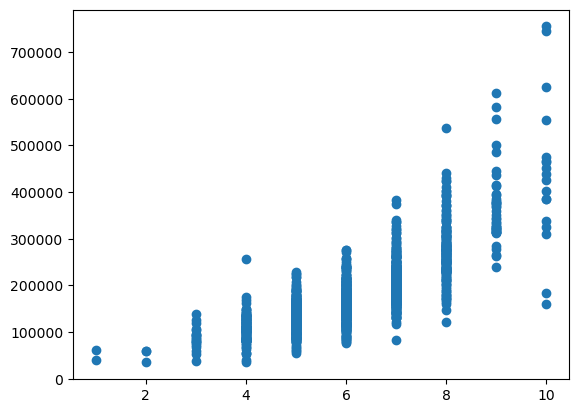

In [40]:
plt.scatter(casas_num["OverallQual"], casas_num["SalePrice"])

### Se analizaron los Datos y se encontro una relacion mas lineal segun las siguientes caracteristicas
# Atributos a Considerar: LotArea, BsmtFinSF1, OverallQual

In [49]:
# COMPROBANDO SI FALTAN DATOS
datos_modelo = casas_num[["LotArea", "BsmtFinSF1", "OverallQual","SalePrice"]]
datos_x.shape

(1460, 4)

In [50]:
datos_modelo.notnull().count()
# De aca concluimos que los datos estan correctamente SIN FALTANTES

LotArea        1460
BsmtFinSF1     1460
OverallQual    1460
SalePrice      1460
dtype: int64

# Generando el Modelo

In [61]:
x_data = datos_modelo[["LotArea", "BsmtFinSF1", "OverallQual"]]
y_data = datos_modelo[["SalePrice"]]

##  Dividiendo los datos de prueba y de test

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [74]:
# Generando el Modelo
lr_multiple = linear_model.LinearRegression()

# Entrenando el Modelo

In [78]:
lr_multiple.fit(x_train, y_train)

LinearRegression()

# Realizando la prediccion

In [81]:
y_predict = lr_multiple.predict(x_test)

# PRECISION DEL MODELO

In [82]:
lr_multiple.score(x_train, y_train)

0.6776113009589857

## Ecuacion de la recta

In [85]:
#coeficientes a
lr_multiple.coef_

array([[1.34405794e+00, 3.12496029e+01, 4.19914336e+04]])

In [118]:
#intercepto
lr_multiple.intercept_

array([-102844.33311529])

# GRAFICANDO LOS DATOS

In [121]:
x_train_graf=list(range(len(y_train)))
x_predict_graf=list(range(len(y_predict)))

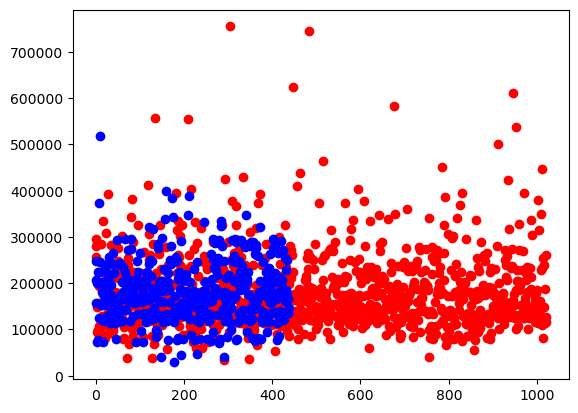

In [124]:
# AQUI SOLO SE PUEDE ANALIZAR LOS RESULTADOS DE "Y", YA QUE NO SE PUEDE GRAFICAR CON 3 VARIABLES "X"
plt.scatter(x_train_graf, y_train, color="red")
plt.scatter(x_predict_graf, y_predict, color="blue")
